In [25]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def map_filename_to_label(filename: str) -> str:
    filename = filename.lower()
    if 'stes' in filename:
        return 'STES'
    elif 'nonetype' in filename:
        return 'baseline'
    elif 'augmentor_combine' in filename:
        return 'aug comb'
    elif 'augmentor_different' in filename:
        return 'aug diff'
    elif 'augmentor_same' in filename:
        return 'aug same'
    else:
        return 'other'

def plot_metrics(models_data, titles, folder_name, type="train"):
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    metrics = ['accuracy', 'loss', 'f1', 'recall', 'precision']
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray', 'olive']

    # Parsowanie folder_name (np. '1008032_b0_p_cifar10')
    parts = folder_name.split('_')
    model_str = parts[1].upper()  # 'B0'
    pretrained = 'pretrained' if 'p' in parts else 'non-pretrained'

    dataset_raw = parts[-1].lower()
    if 'cifar10' in dataset_raw:
        dataset = 'CIFAR10'
    elif 'fashion' in dataset_raw:
        dataset = 'Fashion MNIST'
    else:
        dataset = dataset_raw.capitalize()

    if type == "train":
        title = f'Plots for model: {model_str}-{pretrained}, dataset: {dataset}, train data'
    else:
        title = f'Plots for model: {model_str}-{pretrained}, dataset: {dataset}, val data'

    for i, metric in enumerate(metrics):
        for j, (model_data, _) in enumerate(models_data):
            if metric in model_data.columns:
                axs[i].plot(model_data.index, model_data[metric], label=titles[j], color=colors[j % len(colors)])
        axs[i].set_title(f'{metric.capitalize()}')
        axs[i].set_xlabel('Epoch')
        axs[i].set_ylabel('Value')
        axs[i].legend()
        axs[i].grid()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

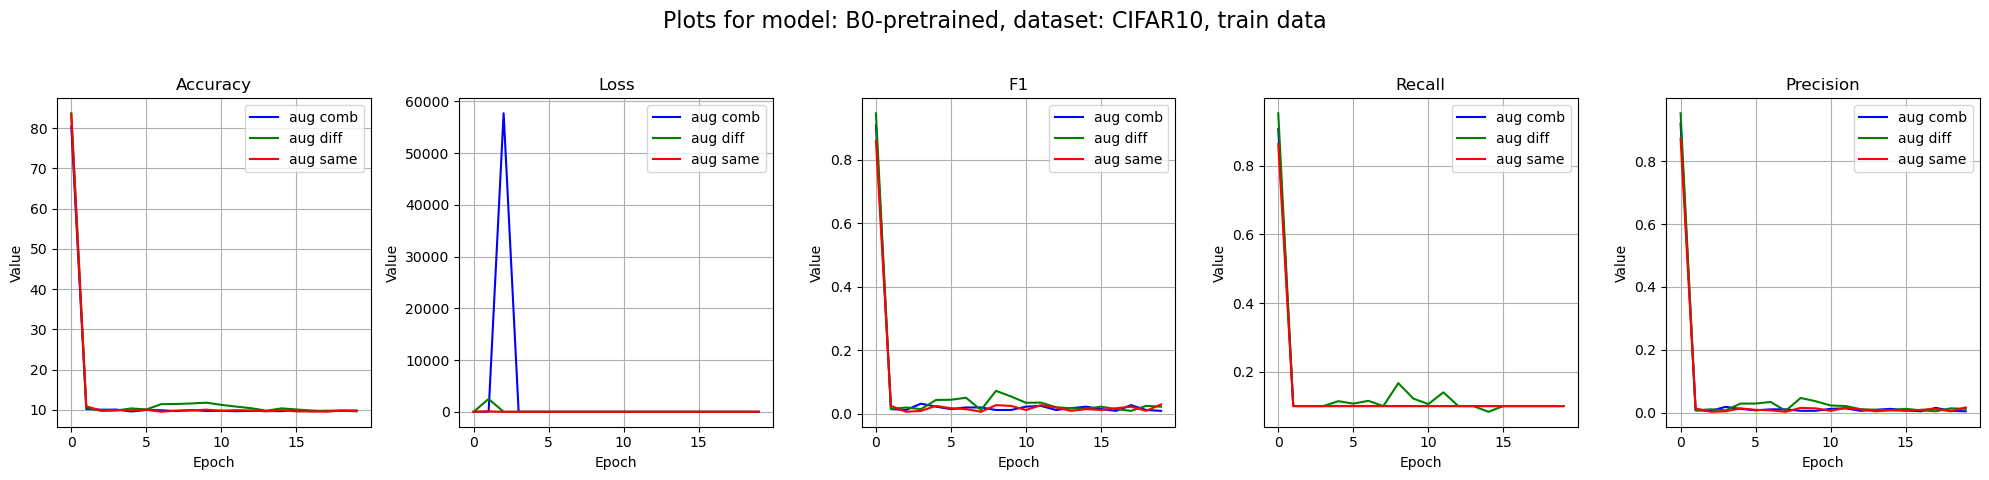

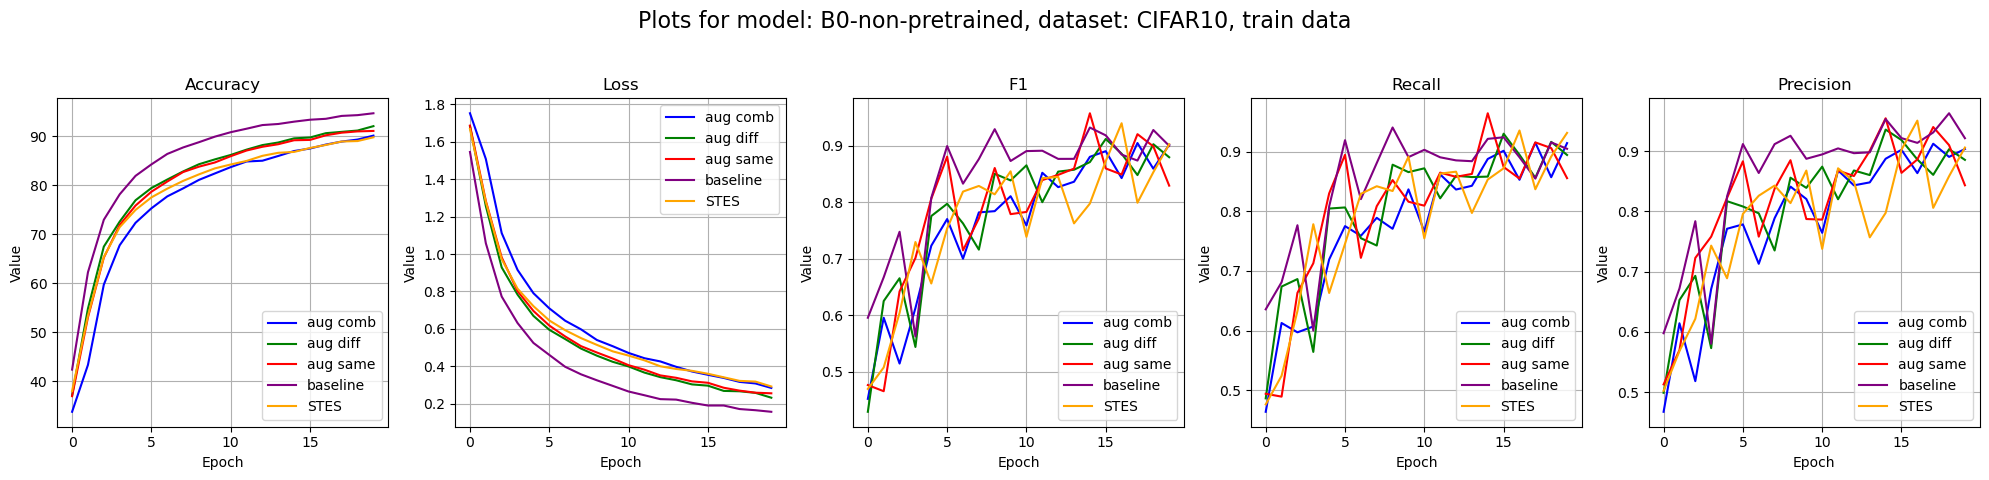

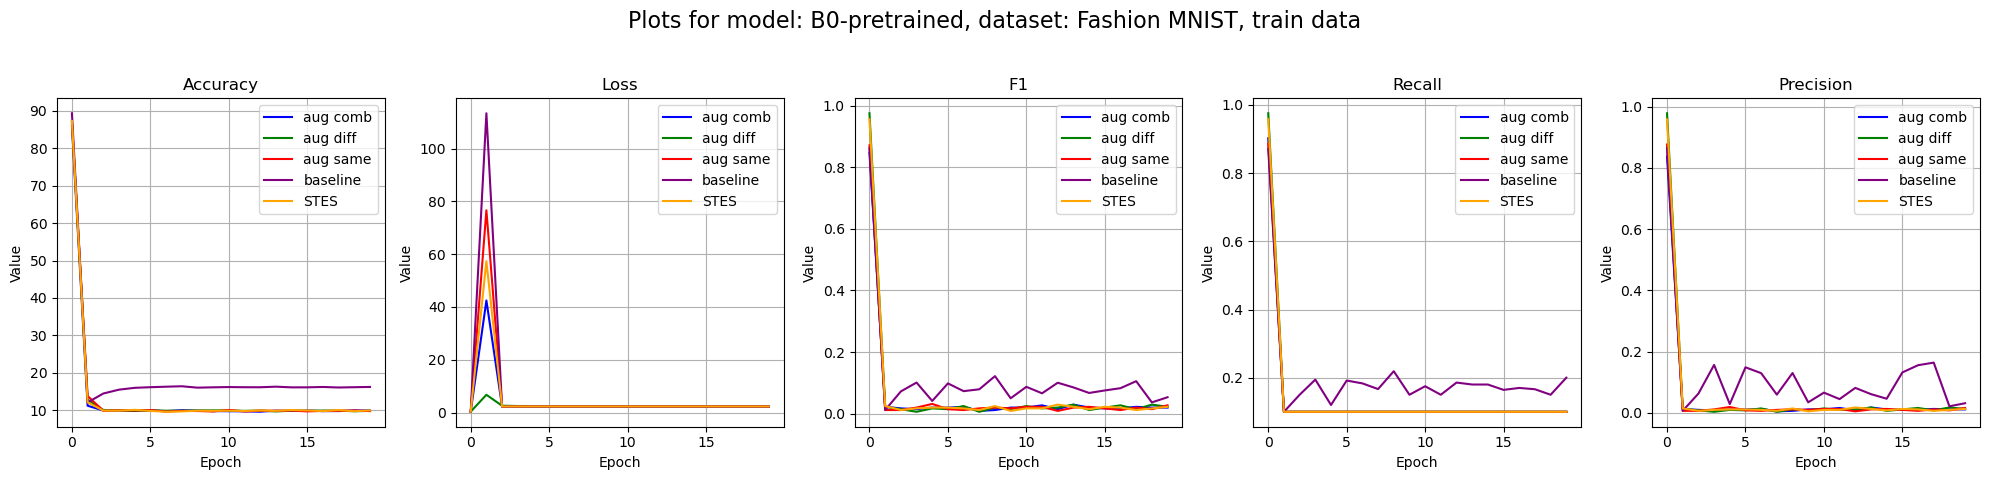

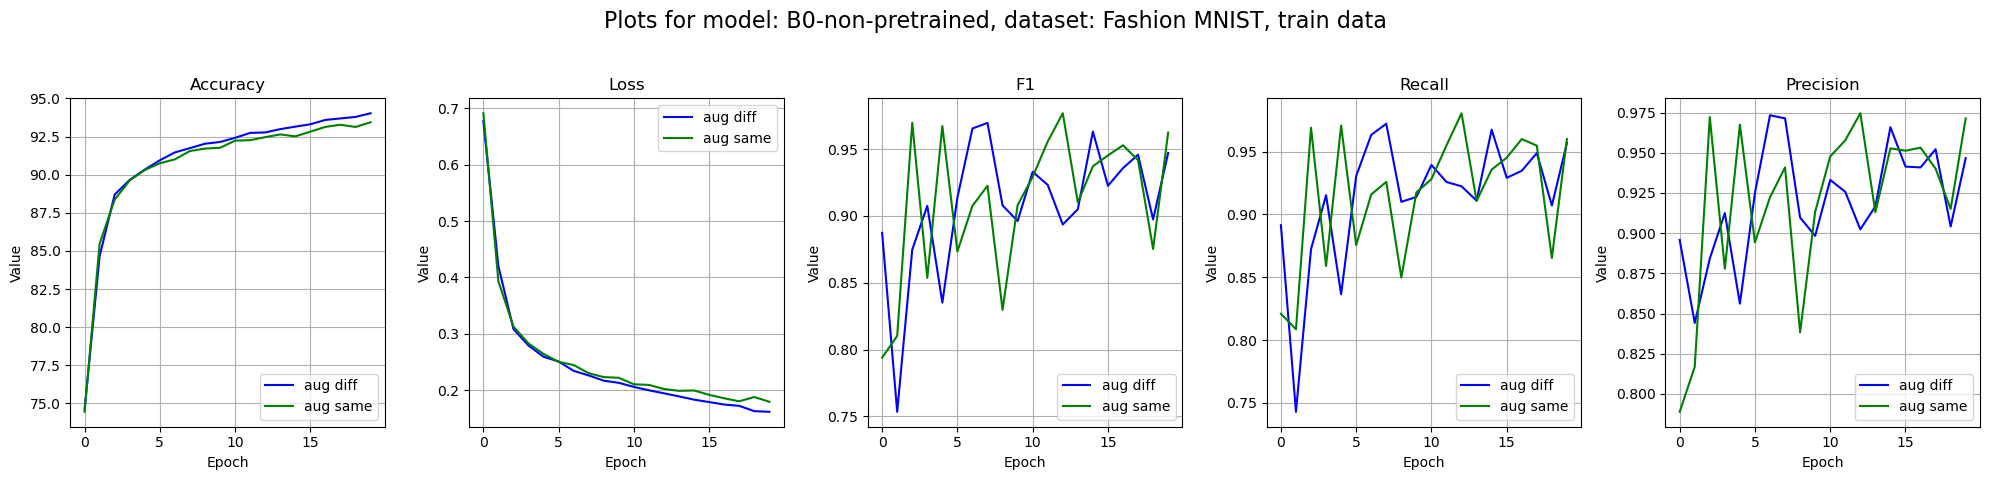

In [27]:
base_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
folder_pattern = re.compile(r'^\d{7,}')
train_csv_pattern = re.compile(r'^(?!.*(?:val|test)\.csv$).*\.csv$')

for item in os.listdir(base_path):
    folder_path = os.path.join(base_path, item)
    if os.path.isdir(folder_path) and folder_pattern.match(item):
        models_data = []
        titles = []
        for file in os.listdir(folder_path):
            if train_csv_pattern.match(file):
                file_path = os.path.join(folder_path, file)
                try:
                    df = pd.read_csv(file_path)
                    df.index.name = 'Epoch'
                    models_data.append((df, file))
                    titles.append(map_filename_to_label(file))
                except Exception as e:
                    print(f"  Błąd podczas wczytywania {file}: {e}")
        if models_data:
            plot_metrics(models_data, titles, item, type="train")
        else:
            print("  Brak plików .csv (bez val/test) do wykresu.")

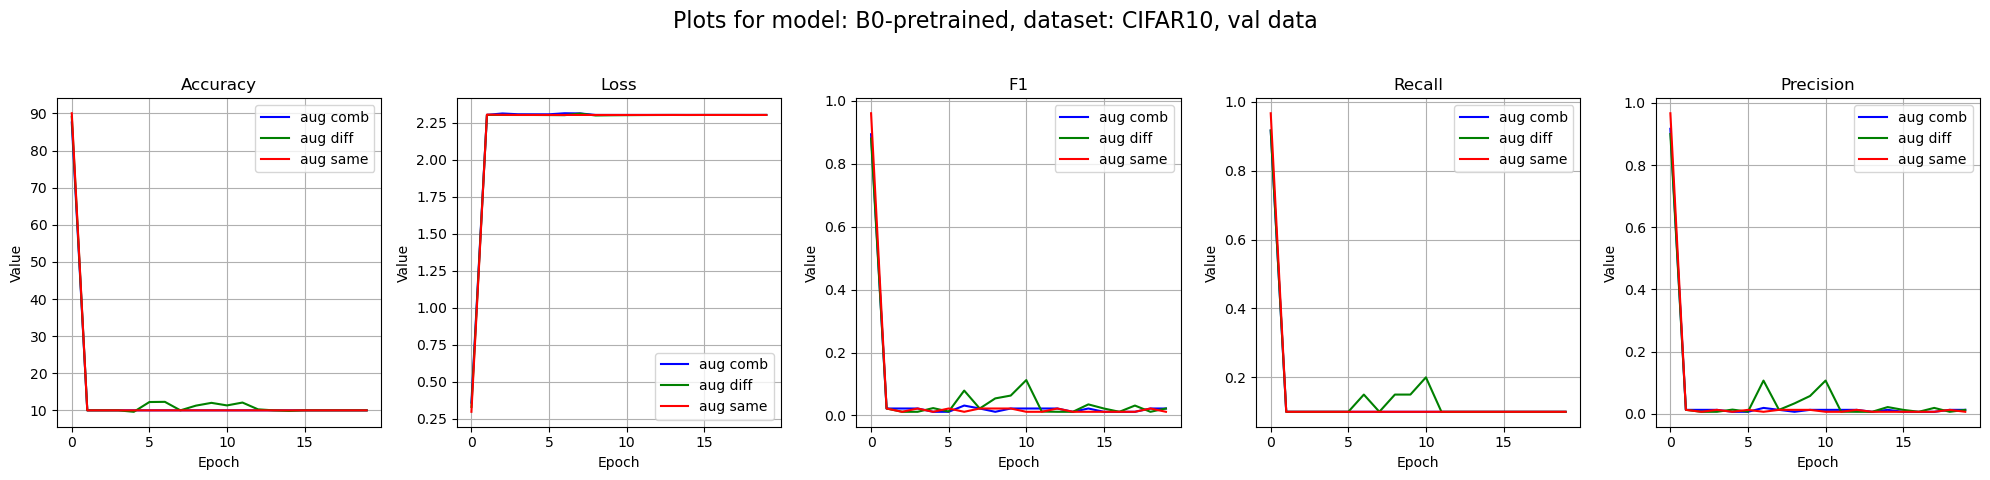

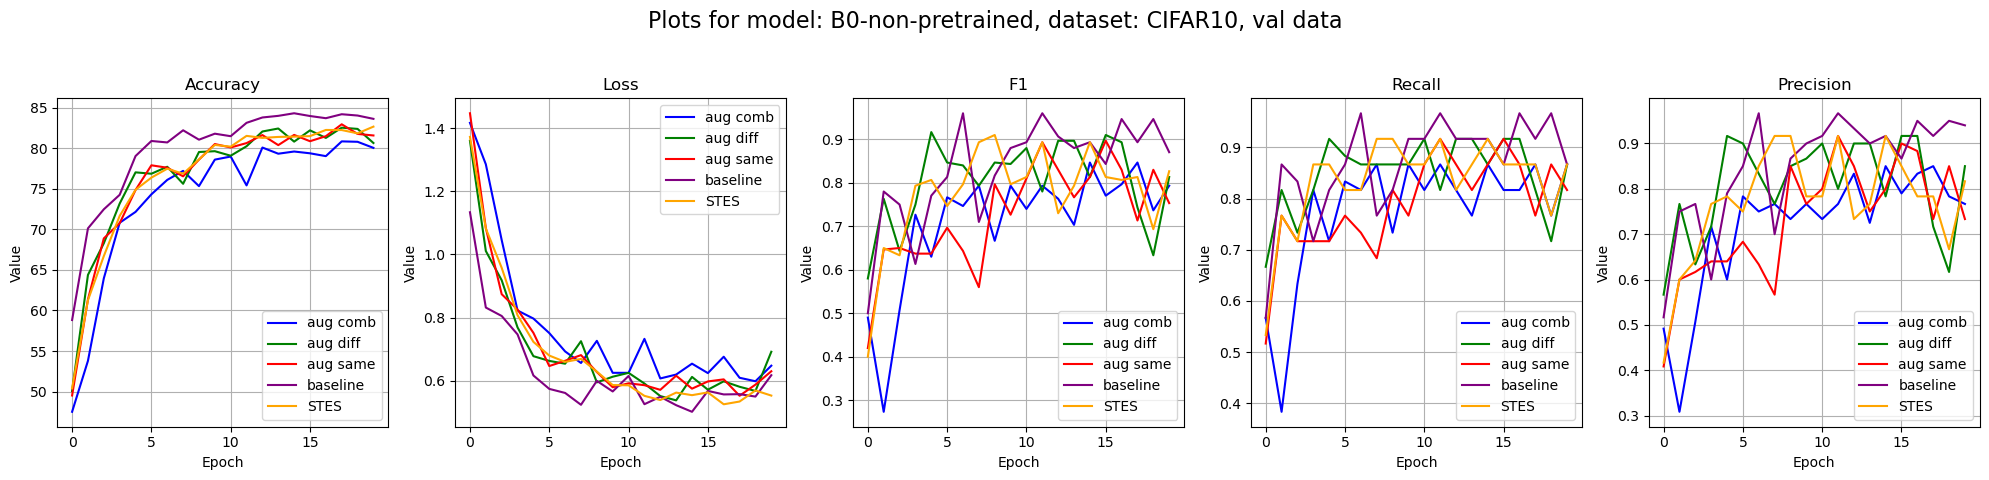

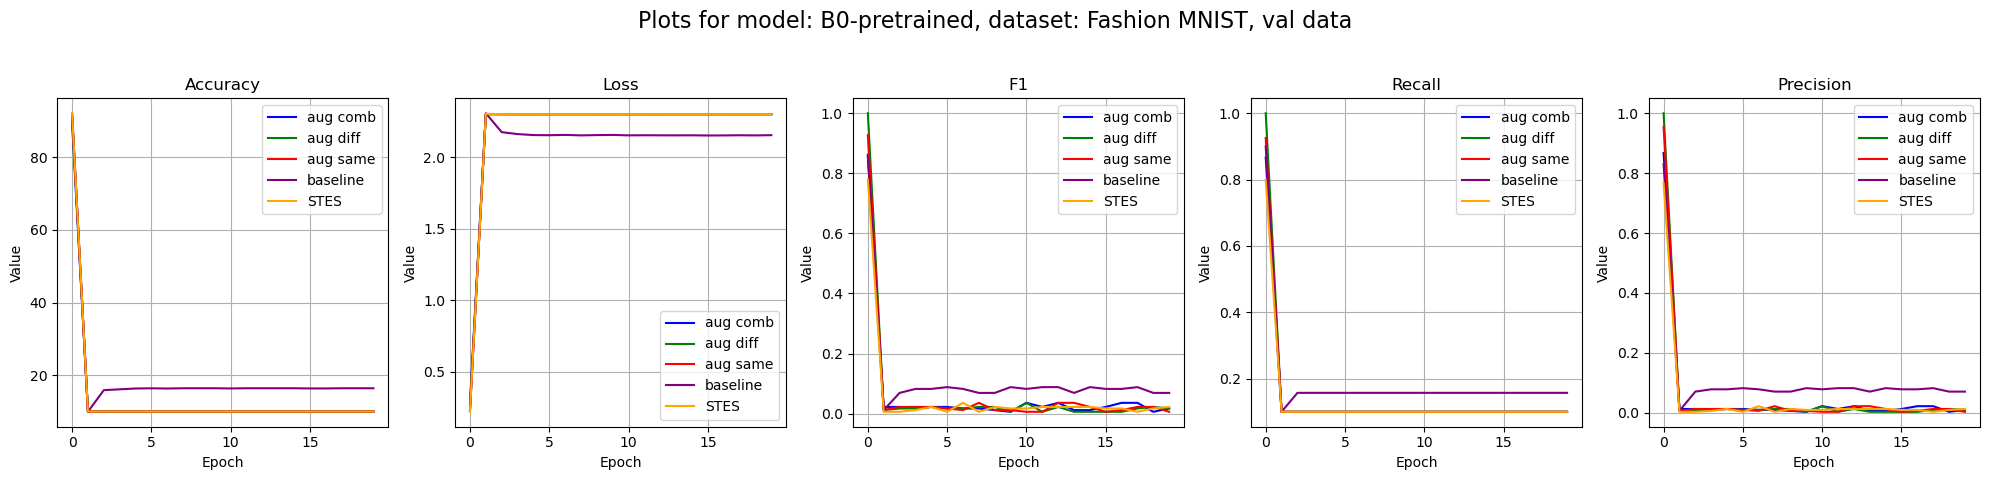

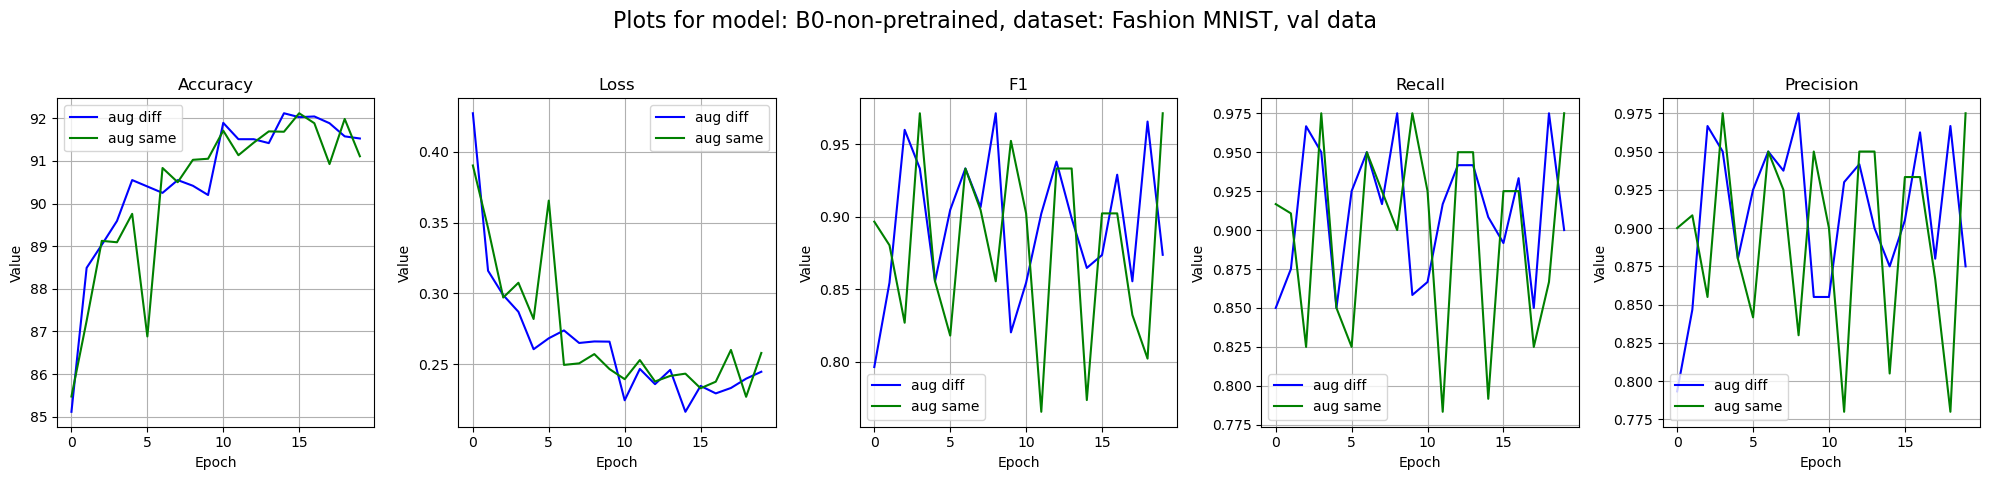

In [28]:
base_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
folder_pattern = re.compile(r'^\d{7,}')
val_csv_pattern = re.compile(r'.*val\.csv$')

for item in os.listdir(base_path):
    folder_path = os.path.join(base_path, item)
    if os.path.isdir(folder_path) and folder_pattern.match(item):
        models_data = []
        titles = []
        for file in os.listdir(folder_path):
            if val_csv_pattern.match(file):
                file_path = os.path.join(folder_path, file)
                try:
                    df = pd.read_csv(file_path)
                    df.index.name = 'Epoch'
                    models_data.append((df, file))
                    titles.append(map_filename_to_label(file))
                except Exception as e:
                    print(f"  Błąd podczas wczytywania {file}: {e}")
        if models_data:
            plot_metrics(models_data, titles, item, type="val")
        else:
            print("  Brak plików val.csv do wykresu.")